In [1]:
import optuna
import plotly

In [2]:
peanut = optuna.load_study(
    study_name='peanut',
    storage='sqlite:////media/nick/Data/GitRepos/land-cover-prediction/output/peanut_optuna.db'
)

In [3]:
peanut.best_params

{'cell_width_pct': 0.125,
 'clip_max_norm': 1.184316464877487,
 'conv_kernel_size': 3,
 'downsample': True,
 'downsample_dim': 64,
 'guassian_blur': False,
 'layer_0': 32,
 'layer_1': 32,
 'lr': 0.0005326639774392545,
 'momentum': 0.7679114313544549,
 'num_layers': 2,
 'optim': 'adam'}

In [26]:
len(peanut.trials)

213

In [7]:
fig = optuna.visualization.plot_param_importances(peanut, params = ['layer_0', 'layer_1'])
fig.show()


In [8]:
fig = optuna.visualization.plot_param_importances(peanut)
fig.show()


In [9]:
fig = optuna.visualization.plot_optimization_history(peanut)
fig.show()

In [50]:
fig = optuna.visualization.plot_slice(peanut)
fig.update_layout(width=7000, height=500, font=dict(family='Arial', size=20, color='black'))
fig.show()

In [52]:
fig = optuna.visualization.plot_contour(peanut, params = ['layer_0', 'layer_1'])
fig.update_layout(width=800, height=500, font=dict(family='Arial', size=20, color='black'))
fig.show()

In [21]:
fig = optuna.visualization.plot_contour(peanut, params = ['downsample_dim', 'guassian_sigma'])
fig.show()

Now, after training with 15 AOIs and testing on 3 AOIs using this optimal model, we get the following:

In [39]:
import pandas as pd
train_report = pd.read_json('../train_report.json')

In [40]:
# train_report = train_report.reset_index().rename(columns={'index':'epoch'})
train_report

,train_losses,test_losses,train_accs,test_accs
0,1.625021,1.854282,0.611203,0.289134
1,1.122677,1.934365,0.611203,0.289134
2,0.984841,1.816298,0.689522,0.431827
3,0.942844,1.859381,0.691445,0.291554
4,0.905462,1.963195,0.689244,0.289134
5,0.907284,1.828966,0.749423,0.580912
6,0.866363,2.102630,0.688517,0.289134
7,0.897736,2.044620,0.691304,0.289134
8,0.890812,1.996689,0.701512,0.308853
9,0.865966,2.031786,0.693058,0.289571


<AxesSubplot:>

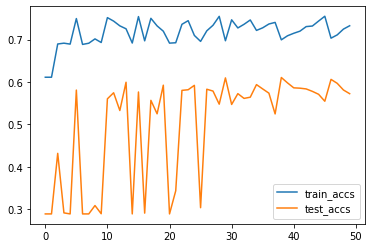

In [44]:
import matplotlib.pyplot as plt

train_report.loc[:,['train_accs','test_accs']].plot()

<AxesSubplot:>

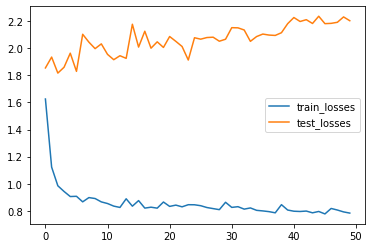

In [45]:
train_report.loc[:,['train_losses','test_losses']].plot()